<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Tackling an NLP Problem with Naive Bayes
_Author: Matt Brems_

----

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we are going to apply a **new** modeling technique to natural language processing data.

> "But how can we apply a modeling technique we haven't learned?!"

The DSI program is great - but we can't teach you *everything* about data science in 12 weeks! This lab is designed to help you start learning something new without it being taught in a formal lesson. 
- Later in the cohort (like for your capstone!), you'll be exploring models, libraries, and resources that you haven't been explicitly taught.
- After the program, you'll want to continue developing your skills. Being comfortable with documentation and being confident in your ability to read something new and decide whether or not it is an appropriate method for the problem you're trying to solve is **incredibly** valuable.

### Step 1: Define the problem.

Many organizations have a substantial interest in classifying users of their product into groups. Some examples:
- A company that serves as a marketplace may want to predict who is likely to purchase a certain type of product on their platform, like books, cars, or food.
- An application developer may want to identify which individuals are willing to pay money for "bonus features" or to upgrade their app.
- A social media organization may want to identify who generates the highest rate of content that later goes "viral."

### Summary
In this lab, you're an engineer for Facebook. In recent years, the organization Cambridge Analytica gained worldwide notoriety for its use of Facebook data in an attempt to sway electoral outcomes.

Cambridge Analytica, an organization staffed with lots of Ph.D. researchers, used the Big5 personality groupings (also called OCEAN) to group people into one of 32 different groups.
- The five qualities measured by this personality assessment are:
    - **O**penness
    - **C**onscientiousness
    - **E**xtroversion
    - **A**greeableness
    - **N**euroticism
- Each person could be classified as "Yes" or "No" for each of the five qualities.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$)
- You don't have to check it out, but if you want to learn more about this personality assessment, head to [the Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits).
- There's also [a short (3-4 pages) academic paper describing part of this approach](./celli-al_wcpr13.pdf).

Cambridge Analytica's methodology was, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big5 personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

You want to know the **real-world problem**: "Is what Cambridge Analytica attempted to do actually possible, or is it junk science?"

However, we'll solve the related **data science problem**: "Are one's Facebook statuses predictive of whether or not one is agreeable?"
> Note: If Facebook statuses aren't predictive of one being agreeable (one of the OCEAN qualities), then Cambridge Analytica's approach won't work very well!

### Step 2: Obtain the data.

Obviously, there are plenty of opportunities to discuss the ethics surrounding this particular issue... so let's do that.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./mypersonality_final.csv', encoding = 'ISO-8859-1')

In [4]:
data.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1


**1. What is the difference between anonymity and confidentiality? All else held equal, which tends to keep people safer?**


For anonymous, it means it is impossible to connect the data back to the original individual.

For confidential, it means somebody could not connect the data back to the original individual.

**2. Suppose that the "unique identifier" in the above data, the `#AUTHID`, is a randomly generated key so that it can never be connected back to the original poster. Have we guaranteed anonymity here? Why or why not?**

I think we can't guarantee anonymity with a specific status post and a specific date and time associated with it, it is possible that we would be able to link it back to a specific user.

**3. As an engineer for Facebook, you recognize that user data will be used by Facebook and by other organizations - that won't change. However, what are at least three recommendations you would bring to your manager to improve how data is used and shared? Be as specific as you can.**

1. Don’t collect data.

2. Choose anonymity over confidentiality where possible. 

3. If we need to collect data, try to apply differential privacy - a constraint of methods used to publish information which limits the disclosure of private information.

### Step 3: Explore the data.

- Note: For our $X$ variable, we will only use the `STATUS` variable. For our $Y$ variable, we will only use the `cAGR` variable.

**4. Explore the data here.**
> We aren't explicitly asking you to do specific EDA here, but what EDA would you generally do with this data? Do the EDA you usually would, especially if you know what the goal of this analysis is.

In [6]:
data.isnull().sum()

#AUTHID         0
STATUS          0
sEXT            0
sNEU            0
sAGR            0
sCON            0
sOPN            0
cEXT            0
cNEU            0
cAGR            0
cCON            0
cOPN            0
DATE            0
NETWORKSIZE     0
BETWEENNESS     0
NBETWEENNESS    0
DENSITY         0
BROKERAGE       0
NBROKERAGE      0
TRANSITIVITY    1
dtype: int64

In [7]:
data.dtypes

#AUTHID          object
STATUS           object
sEXT            float64
sNEU            float64
sAGR            float64
sCON            float64
sOPN            float64
cEXT             object
cNEU             object
cAGR             object
cCON             object
cOPN             object
DATE             object
NETWORKSIZE     float64
BETWEENNESS     float64
NBETWEENNESS    float64
DENSITY         float64
BROKERAGE       float64
NBROKERAGE      float64
TRANSITIVITY    float64
dtype: object

In [8]:
data.shape

(9917, 20)

In [9]:
corr = data.corr()

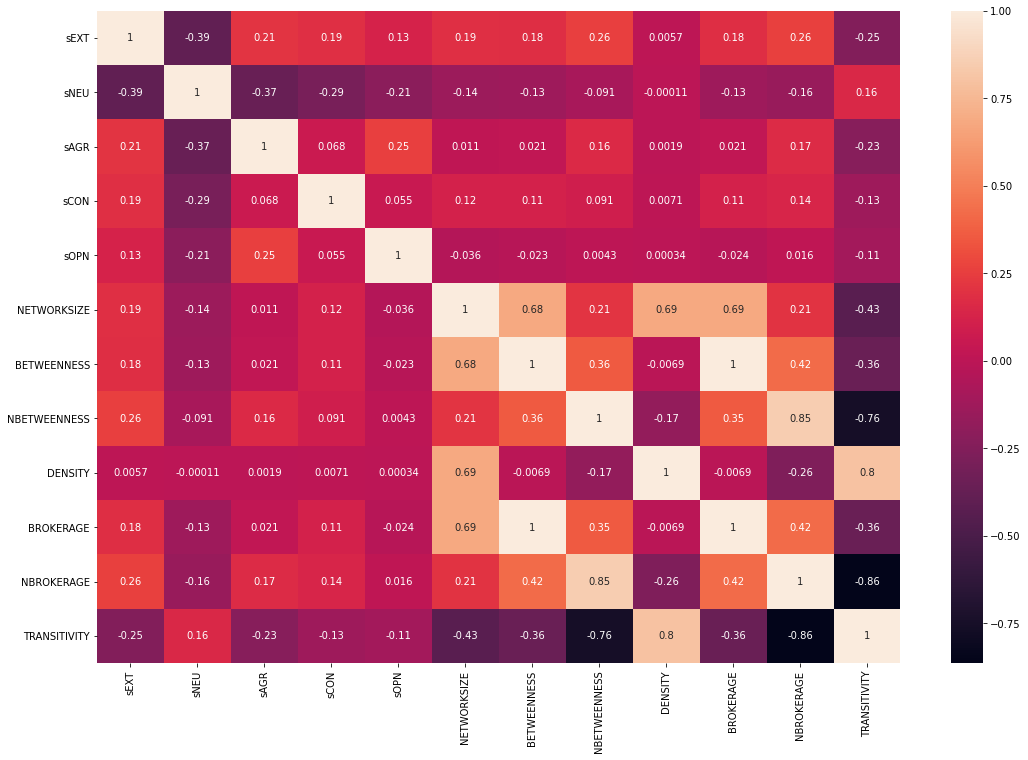

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,12))

sns.heatmap(corr,annot=True);

**5. What is the difference between CountVectorizer and TFIDFVectorizer?**

TF-IDF is to minimize the impact of words that occur frequently in a certain set of words.

Cvec is to transform the lists of words into features that we can pass into a model. TfidfVectorizer() assigns a score for the term frequency while CountVectorizer() returns a count of the number of times a word appears.

**6. What are stopwords?**

Stopwords are very common words that are often removed because they amount to unnecessary information and removing them can dramatically speed up processing. Examples:"the," "of," ,"and," "a," "to," "in".

**7. Give an example of when you might remove stopwords.**

If we were trying to identify the sentiment of a review and the vast majority of the words had neither a positive sentiment nor negative sentiment, we might consider removing the stop words so that we are left only with more substantive words.

**8. Give an example of when you might keep stopwords in your model.**

If we were comparing children's books, stopwords may be a very impactful portion of our total corpus. Example: THE cat IN THE hat. Or perhaps if we were trying to compare poetry. Example: TO BE OR NOT TO BE. THAT IS THE question.

### Step 4: Model the data.

We are going to fit two types of models: a logistic regression and [a Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html).

**Reminder:** We will only use the feature `STATUS` to model `cAGR`.

### We want to attempt to fit our models on sixteen sets of features:

1. CountVectorizer with 100 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
2. CountVectorizer with 100 features, with English stopwords removed and with the default `ngram_range`.
3. CountVectorizer with 100 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
4. CountVectorizer with 100 features, with English stopwords kept in and with the default `ngram_range`.
5. CountVectorizer with 500 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
6. CountVectorizer with 500 features, with English stopwords removed and with the default `ngram_range`.
7. CountVectorizer with 500 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
8. CountVectorizer with 500 features, with English stopwords kept in and with the default `ngram_range`.
9. TFIDFVectorizer with 100 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
10. TFIDFVectorizer with 100 features, with English stopwords removed and with the default `ngram_range`.
11. TFIDFVectorizer with 100 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
12. TFIDFVectorizer with 100 features, with English stopwords kept in and with the default `ngram_range`.
13. TFIDFVectorizer with 500 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
14. TFIDFVectorizer with 500 features, with English stopwords removed and with the default `ngram_range`.
15. TFIDFVectorizer with 500 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
16. TFIDFVectorizer with 500 features, with English stopwords kept in and with the default `ngram_range`.

**9. Rather than manually instantiating 16 different vectorizers, what `sklearn` class have we learned about that might make this easier? Use it.**

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [30]:
X = data['STATUS']
y = data['cAGR']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [32]:
pipe1 = Pipeline([('cvec', CountVectorizer()),
                 ('lr', LogisticRegression())])

pipe1

Pipeline(steps=[('cvec', CountVectorizer()), ('lr', LogisticRegression())])

In [33]:
pipe_params1 = {
    'cvec__max_features': [100, 500],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words':['english', None]
}

gs1 = GridSearchCV(pipe1, param_grid=pipe_params1, cv=3)

gs1.fit(X_train, y_train)

print(gs1.best_score_)

gs1.best_params_

0.5467258303079199


{'cvec__max_features': 500,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [35]:
pipe2 = Pipeline([('tvec', TfidfVectorizer()),
                 ('lr', LogisticRegression())])

pipe2

Pipeline(steps=[('tvec', TfidfVectorizer()), ('lr', LogisticRegression())])

In [36]:
pipe_params2 = {
    'tvec__max_features': [100, 500],
    'tvec__ngram_range': [(1,1), (1,2)],
    'tvec__stop_words':['english', None]
}

gs2 = GridSearchCV(pipe2, param_grid=pipe_params2, cv=3)

gs2.fit(X_train, y_train)

print(gs2.best_score_)

gs2.best_params_

0.5510286405808794


{'tvec__max_features': 500,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

**10. What are some of the advantages of fitting a logistic regression model?**

For anonymous, it means it is impossible to connect the data back to the original individual.
For confidential, it means somebody could not connect the data back to the original individual.

**11. Fit a logistic regression model and compare it to the baseline.**

A Logistic regression is more informative. The logistic regression gives a measure of how relevant a predictor is (coefficient size) but also its direction of association (positive or negative).

In [37]:
#Baseline
data['cAGR'].value_counts(normalize=True)

y    0.531209
n    0.468791
Name: cAGR, dtype: float64

In [38]:
lr = LogisticRegression()
cvec = CountVectorizer()
train_data_features3 = cvec.fit_transform(X_train)

test_data_features3 = cvec.transform(X_test)

# Numpy arrays are easy to work with, so convert the result to an 
# array.
train_data_features3 = train_data_features3.toarray()

In [39]:
lr.fit(train_data_features3, y_train)

LogisticRegression()

In [40]:
print(f' Logistic Test Score is: {lr.score(test_data_features3, y_test)}')
print(f' Baseli')

 Logistic Test Score is: 0.5834677419354839
 Baseli


### Summary of Naive Bayes 

Naive Bayes is a classification technique that relies on probability to classify observations.
- It's based on a probability rule called **Bayes' Theorem**... thus, "**Bayes**."
- It makes an assumption that isn't often met, so it's "**naive**."

Despite being a model that relies on a naive assumption, it often performs pretty well! (This is kind of like linear regression... we aren't always guaranteed homoscedastic errors in linear regression, but the model might still do a good job regardless.)
- [Interested in details? Read more here if you want.](https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf)


The [sklearn documentation](https://scikit-learn.org/stable/modules/naive_bayes.html) is here, but it can be intimidating. So, to quickly summarize the Bayes and Naive parts of the model...

#### Bayes' Theorem
If you've seen Bayes' Theorem, it relates the probability of $P(A|B)$ to $P(B|A)$. (Don't worry; we won't be doing any probability calculations by hand! However, you may want to refresh your memory on conditional probability from our earlier lessons if you forget what a conditional probability is.)

$$
\begin{eqnarray*}
\text{Bayes' Theorem: } P(A|B) &=& \frac{P(B|A)P(A)}{P(B)}
\end{eqnarray*}
$$

- Let $A$ be that someone is "agreeable," like the OCEAN category.
- Let $B$ represent the words used in their Facebook post.

$$
\begin{eqnarray*}
\text{Bayes' Theorem: } P(A|B) &=& \frac{P(B|A)P(A)}{P(B)} \\
\Rightarrow P(\text{person is agreeable}|\text{words in Facebook post}) &=& \frac{P(\text{words in Facebook post}|\text{person is agreeable})P(\text{person is agreeable})}{P(\text{words in Facebook post})}
\end{eqnarray*}
$$

We want to calculate the probability that someone is agreeable **given** the words that they used in their Facebook post! (Rather than calculating this probability by hand, this is done under the hood and we can just see the results by checking `.predict_proba()`.) However, this is exactly what our model is doing. We can (a.k.a. the model can) calculate the pieces on the right-hand side of the equation to give us a probability estimate of how likely someone is to be agreeable given their Facebook post.

#### Naive Assumption

If our goal is to estimate $P(\text{person is agreeable}|\text{words in Facebook post})$, that can be quite tricky.

---

<details><summary>Bonus: if you want to understand why that's complicated, click here.</summary>
    
- The event $\text{"words in Facebook post"}$ is a complicated event to calculate.

- If a Facebook post has 100 words in it, then the event $\text{"words in Facebook post"} = \text{"word 1 is in the Facebook post" and "word 2 is in the Facebook post" and }\ldots \text{ and "word 100 is in the Facebook post"}$.

- To calculate the joint probability of all 100 words being in the Facebook post gets complicated pretty quickly. (Refer back to the probability notes on how to calculate the joint probability of two events if you want to see more.)
</details>

---

To simplify matters, we make an assumption: **we assume that all of our features are independent of one another.**

In some contexts, this assumption might be realistic!

**12. Why would this assumption not be realistic with NLP data?**

Despite this assumption not being realistic with NLP data, we still use Naive Bayes pretty frequently.
- It's a very fast modeling algorithm. (which is great especially when we have lots of features and/or lots of data!)
- It is often an excellent classifier, outperforming more complicated models.

There are three common types of Naive Bayes models: Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes.
- How do we pick which of the three models to use? It depends on our $X$ variable.
    - Bernoulli Naive Bayes is appropriate when our features are all 0/1 variables.
        - [Bernoulli NB Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)
    - Multinomial Naive Bayes is appropriate when our features are variables that take on only positive integer counts.
        - [Multinomial NB Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
    - Gaussian Naive Bayes is appropriate when our features are Normally distributed variables. (Realistically, though, we kind of use Gaussian whenever neither Bernoulli nor Multinomial works.)
        - [Gaussian NB Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

NLP data is typically all coming from the same source or corpus. So it's kind of safe to assume that most of the features are NOT independant of each other.

**13. Suppose you CountVectorized your features. Which Naive Bayes model would be most appropriate to fit? Why? Fit it.**

As the code below, multinomial would be the most appropriate fit. We dont know that the features are going to be normally distributed and the features are not all going to be 0/1. This rules out both the Bernoulli and the Gaussian NB Classifications. Since the Count vectorizer is taking a word count.

In [41]:
from sklearn.naive_bayes import MultinomialNB
cvec = CountVectorizer()
train_data_features = cvec.fit_transform(X_train)

test_data_features = cvec.transform(X_test)

# Numpy arrays are easy to work with, so convert the result to an 
# array.
train_data_features = train_data_features.toarray()

In [42]:
mnb = MultinomialNB()
mnb.fit(train_data_features, y_train)
print(f' Test Score is: {mnb.score(test_data_features, y_test)}')

 Test Score is: 0.6020161290322581


**14. Suppose you TFIDFVectorized your features. Which Naive Bayes model would be most appropriate to fit? Why? Fit it.**

MultinomialNB it hs highest score

**15. Compare the performance of your models.**

In [43]:
print('Baseline score is') 
print(data['cAGR'].value_counts(normalize=True))

Baseline score is
y    0.531209
n    0.468791
Name: cAGR, dtype: float64


In [44]:
print(f' MultinomialNB Test Score is: {mnb.score(test_data_features, y_test)}')

 MultinomialNB Test Score is: 0.6020161290322581


In [45]:
print(f' Test Score is: {mnb.score(test_data_features, y_test)}')

 Test Score is: 0.6020161290322581


**16. Even though we didn't explore the full extent of Cambridge Analytica's modeling, based on what we did here, how effective was their approach at using Facebook data to model agreeableness?**

They did not do well due to low test scores, however I suppose you can say that theoir model improved on the baseline so it was kind of a success